# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

In [2]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [5]:
#Ajustes iniciais - tipo de separador e tipo de dados
for col in new_column_names[2:]:
    countries[col] = countries[col].apply(lambda x: str(x).replace(',','.'))
    countries[col] = countries[col].astype('float64')


In [6]:
#Ajustes iniciais - romeve espaços 
countries['Country'] = countries['Country'].apply(lambda x : x.strip())
countries['Region'] = countries['Region'].apply(lambda x : x.strip())


## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [7]:
#Q1
regioes = list(countries['Region'].sort_values().unique())

In [8]:
def q1():
    return regioes
    pass

___________________________________________________________________________________________________________________

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [9]:
#Q2
from sklearn.preprocessing import KBinsDiscretizer

dens_pop = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
discretz = dens_pop.fit_transform(countries[['Pop_density']])

In [10]:
def q2():
    return int((discretz >=9).sum())
    pass

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [11]:
#Q3
from sklearn.preprocessing import OneHotEncoder
encoded = OneHotEncoder(sparse = False).fit_transform(countries[['Region', 'Climate']].fillna(0))

In [36]:
def q3():
    return int(encoded.shape[1])
    pass

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [12]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [14]:
#Q4 - Libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#Selecionando variáveis numéricas\n",
var_num = countries.select_dtypes(exclude=['object'])

#Construção da pipeline
pipe = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'median')), 
                         ('scaler', StandardScaler())])

pipe.fit(var_num)
pipe_transform = pipe.transform([test_country[2:]])

resol = pipe_transform[:, var_num.columns.get_loc('Arable')]

array([-1.04685743])

In [55]:
def q4():
    return round(resol.item(),3)
    pass

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [57]:
#Q5
Q1 = countries['Net_migration'].quantile(0.25)
Q3 = countries['Net_migration'].quantile(0.75)

IQR = Q3 - Q1

0.9974999999999999

In [58]:
#Cálculo dos limites
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

(-3.8149999999999995, 3.885)

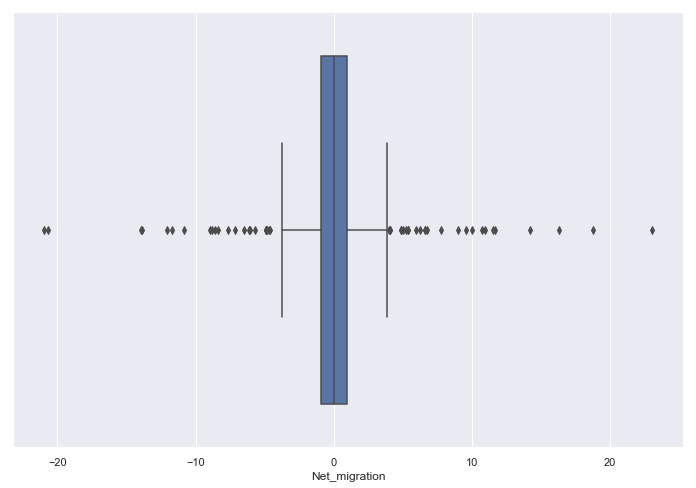

In [63]:
import seaborn as sns
sns.boxplot(countries['Net_migration']);

In [64]:
#Cálculo dos outliers
out_inf = len(countries['Net_migration'][(countries['Net_migration'] < lim_inf)])
out_sup = len(countries['Net_migration'][(countries['Net_migration'] > lim_sup)])

In [65]:
def q5():
    return (out_inf, out_sup, False)
    pass

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [15]:
#Q6
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)


In [16]:
def q6():
    vect = CountVectorizer()
    solu = vect.fit_transform(newsgroup.data)
    return int(solu[:, vect.vocabulary_['phone']].sum())
    pass

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [18]:
#Q7
from sklearn.feature_extraction.text import TfidfVectorizer

In [1]:
def q7():
    tfidf = TfidfVectorizer()
    resol = tfidf.fit_transform(newsgroup.data)
    
    return float(np.round(((resol[:, tfidf.vocabulary_['phone']].sum())),3))
    pass